<a href="https://colab.research.google.com/github/Gopizone/DS/blob/main/PCA%2C%20hierarchal%2C%20kmean(Universities).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files=files.upload()

Saving Universities.csv to Universities.csv


In [2]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

In [3]:
uni = pd.read_csv("Universities.csv")
uni.describe()
uni.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90


In [4]:
# Considering only numerical data 
uni.data = uni.iloc[:,1:]
uni.data.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,1310,89,22,13,22704,94
1,1415,100,25,6,63575,81
2,1260,62,59,9,25026,72
3,1310,76,24,12,31510,88
4,1280,83,33,13,21864,90


In [5]:
# Normalizing the numerical data 
uni_normal = scale(uni.data)

In [6]:
uni_normal

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [7]:
pca = PCA()
pca_values = pca.fit_transform(uni_normal)

In [8]:
pca_values

array([[-1.00987445e+00, -1.06430962e+00,  8.10663051e-02,
         5.69506350e-02, -1.28754245e-01, -3.46496377e-02],
       [-2.82223781e+00,  2.25904458e+00,  8.36828830e-01,
         1.43844644e-01, -1.25961913e-01, -1.80703168e-01],
       [ 1.11246577e+00,  1.63120889e+00, -2.66786839e-01,
         1.07507502e+00, -1.91814148e-01,  3.45679459e-01],
       [-7.41741217e-01, -4.21874699e-02,  6.05008649e-02,
        -1.57208116e-01, -5.77611392e-01,  1.09163092e-01],
       [-3.11912064e-01, -6.35243572e-01,  1.02405189e-02,
         1.71363672e-01,  1.27261287e-02, -1.69212696e-02],
       [-1.69669089e+00, -3.44363283e-01, -2.53407507e-01,
         1.25643278e-02, -5.26606002e-02, -2.71661600e-02],
       [-1.24682093e+00, -4.90983662e-01, -3.20938196e-02,
        -2.05643780e-01,  2.93505340e-01, -7.80119838e-02],
       [-3.38749784e-01, -7.85168589e-01, -4.93584829e-01,
         3.98563085e-02, -5.44978619e-01, -1.55371653e-01],
       [-2.37415013e+00, -3.86538883e-01,  1.160

In [9]:
#pca = PCA(n_components = 6)
#pca_values = pca.fit_transform(uni_normal)

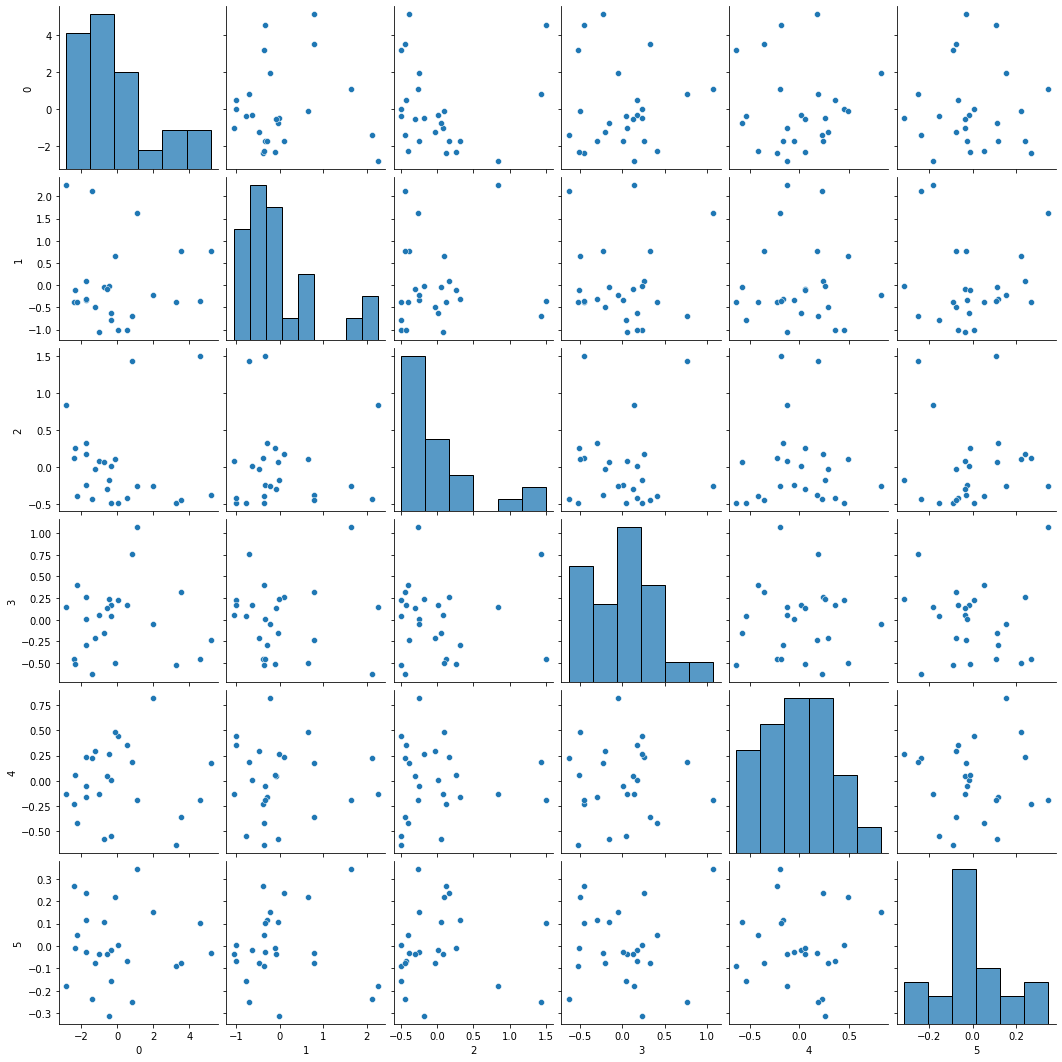

In [10]:
import seaborn as sns
sns.pairplot(pd.DataFrame(pca_values))

In [11]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.76868084, 0.13113602, 0.04776031, 0.02729668, 0.0207177 ,
       0.00440844])

In [12]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 76.87,  89.98,  94.76,  97.49,  99.56, 100.  ])

In [13]:
pca.components_

array([[-0.45774863, -0.42714437,  0.42430805,  0.39064831, -0.36252316,
        -0.37940403],
       [ 0.03968044, -0.19993153,  0.32089297, -0.43256441,  0.6344864 ,
        -0.51555367],
       [ 0.1870388 ,  0.49780855, -0.15627899,  0.60608085,  0.20474114,
        -0.53247261],
       [ 0.13124033,  0.37489567,  0.0612872 , -0.50739095, -0.62340055,
        -0.43863341],
       [ 0.02064583,  0.4820162 ,  0.8010936 ,  0.07682369,  0.07254775,
         0.33810965],
       [ 0.8580547 , -0.39607492,  0.21693361,  0.1720479 , -0.17376309,
        -0.00353754]])

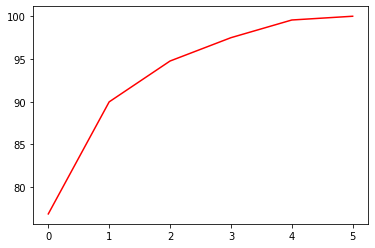

In [14]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red")

In [15]:
 pca_values[:,0:1]

array([[-1.00987445],
       [-2.82223781],
       [ 1.11246577],
       [-0.74174122],
       [-0.31191206],
       [-1.69669089],
       [-1.24682093],
       [-0.33874978],
       [-2.37415013],
       [-1.40327739],
       [-1.72610332],
       [-0.45085748],
       [ 0.04023814],
       [ 3.23373034],
       [-2.23626502],
       [ 5.17299212],
       [-1.69964377],
       [ 4.578146  ],
       [ 0.82260312],
       [-0.09776213],
       [ 1.9631826 ],
       [-0.54228894],
       [ 0.53222092],
       [ 3.54869664],
       [-2.30590032]])

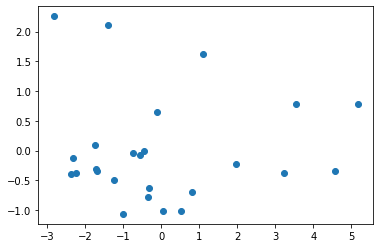

In [16]:
# plot between PCA1 and PCA2 
x = pca_values[:,0:1]
y = pca_values[:,1:2]
#z = pca_values[:2:3]
plt.scatter(x,y)

In [17]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['pc1','pc2']), uni[['Univ']]], axis = 1)

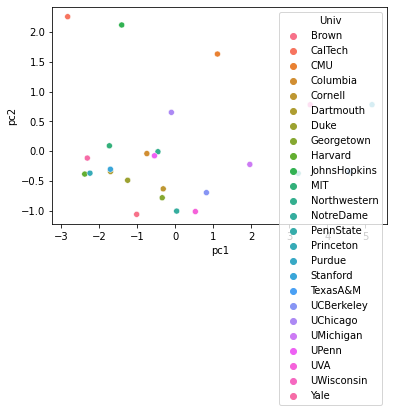

In [18]:
import seaborn as sns
sns.scatterplot(data=finalDf,x='pc1',y='pc2',hue='Univ')

In [24]:
pcavalues=pd.DataFrame(pca_values[:,:3],columns=['pc1','pc2','pc3'])

In [25]:
pcavalues

,pc1,pc2,pc3
0,-1.009874,-1.064310,0.081066
1,-2.822238,2.259045,0.836829
2,1.112466,1.631209,-0.266787
3,-0.741741,-0.042187,0.060501
4,-0.311912,-0.635244,0.010241
5,-1.696691,-0.344363,-0.253408
6,-1.246821,-0.490984,-0.032094
7,-0.338750,-0.785169,-0.493585
8,-2.374150,-0.386539,0.116098
9,-1.403277,2.119515,-0.442827


# Hierarichal Clustering 

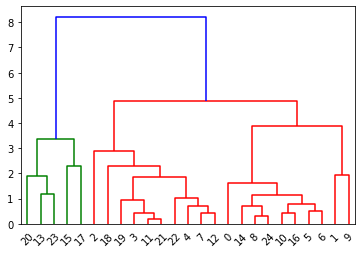

In [27]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(pcavalues, method='complete'))

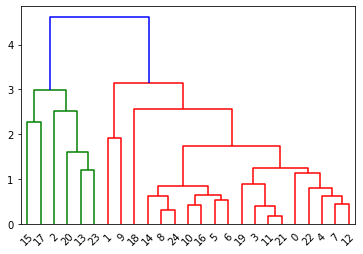

In [28]:
dendrogram = sch.dendrogram(sch.linkage(pcavalues, method='average'))

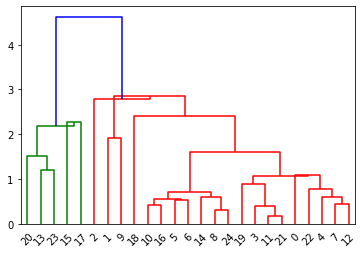

In [29]:
dendrogram = sch.dendrogram(sch.linkage(pcavalues, method='centroid'))

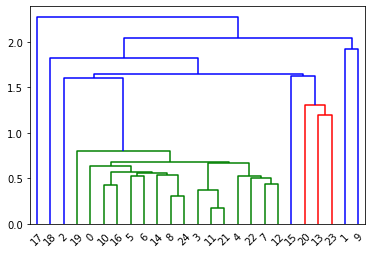

In [31]:
dendrogram = sch.dendrogram(sch.linkage(pcavalues, method='single'))

In [32]:
# create clusters
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')

In [33]:
y_hc = hc.fit_predict(pcavalues)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [35]:
uni['h_clusterid'] = pd.DataFrame(y_hc)

In [36]:
uni

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,0


In [37]:
#Grouping Data for predictions further 

result=uni.iloc[:,1:].groupby(uni.h_clusterid).mean()

In [38]:
result

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
h_clusterid,,,,,,,
0,1357.5,90.4,24.1,10.0,39329.6,92.4,0
1,1085.2,44.0,69.6,18.6,11056.4,74.4,1
2,1266.0,78.8,39.1,12.5,23612.2,87.2,2


# Kmean 

In [39]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 

In [44]:

k = list(range(2,8))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pcavalues)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(pcavalues.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,pcavalues.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
    
TWSS

[array([33.19885164]),
 array([27.6748009]),
 array([23.76263926]),
 array([20.60581669]),
 array([19.05542763]),
 array([16.61241392])]

([<matplotlib.axis.XTick at 0x7fe60a2e52b0>,
 <a list of 6 Text major ticklabel objects>)

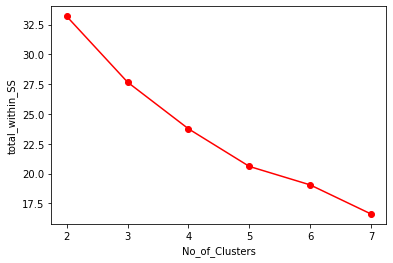

In [45]:
#Elbow Chart
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

In [46]:
kmeans_clust=KMeans(n_clusters=5)
kmeans_clust.fit(pcavalues)
Clusters=pd.DataFrame(kmeans_clust.labels_,columns=['Clusters'])
Clusters

,Clusters
0,2
1,4
2,1
3,2
4,2
5,0
6,0
7,2
8,0
9,4


In [47]:
uni['h_clusterid'] = pd.DataFrame(y_hc)
uni

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,2
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,0


In [48]:
#Grouping Data for predictions further 

result=uni.iloc[:,1:].groupby(uni.h_clusterid).mean()
result

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
h_clusterid,,,,,,,
0,1357.5,90.4,24.1,10.0,39329.6,92.4,0
1,1085.2,44.0,69.6,18.6,11056.4,74.4,1
2,1266.0,78.8,39.1,12.5,23612.2,87.2,2
